# Motion Detection Data - Part 1

_Jennifer Nguyen (October 2020)_

----

This notebook analyzes motion detection data from two sensors detecting objects in the vicinity.  The sensors (A & B) are set up at some distance from each other and each one detects electronic signals given off by nearby objects. Whenever an object is detected the sensor records the object's ID, the time of the detection event, and the signal strength between the sensor and the object. 

Given the unique electronic signal of each object, each detected object is assigned a unique ID which remains the same for all future detections. Depending on the position of the objects with respect to each sensor, they will record different signal strenghts. There are two tables for each sensor which have the following format:

+ Table 1: timestamp_list
 - tID: ID of the recorded timestamp
 - DateTime:  the Timestamp of the detection event


+ Table 2: Detection
 - ID:     the object’s ID
 - tID :   ID of the recorded timestamp
 - Strength :  the signal strength between the sensor and object (measured in a decibel scale)
 
The goal of this project is to extract as much information as possible about the objects, their presence, their location with respect to the two sensors, etc. You are free to decide how you want to explore the data and the extent of the information you extract. Here are some example steps/question that could guide you to get started :

+ What are the common objects between the two sensors?
+ What are the objects detected by only one of the sensor?
+ How does the strength of the detected signal vary for common / uncommon objects?
+ How does the signal strength vary between sensors?
+ Which objects are always present?
+ Which objects are frequently detected?
+ Which objects are rarely detected?
+ What is the signal strength distribtuion for each detector? Plot the histogram for each.
----

## Outline:

<a href="#s1"> **1. Read the Datasets and Data Preparation** </a>

- 1.1 Sensor 1
- 1.2 Sensor 2
    
<a href="#s2"> **2. Exploring Data from two Sensors** </a>

- What are the common objects between the two sensors?
- What are the objects detected by only one of the sensor?
- How does the strength of the detected signal vary for common / uncommon objects?
- How does the signal strength vary between sensors?
- Which objects are always present?
- Which objects are frequently detected?
- Which objects are rarely detected?
- What is the signal strength distribtuion for each detector? Plot the histogram for each.


In [1]:
# Check working directory to make sure we are in the right folder
import os
os.getcwd()

'C:\\Users\\Jennifer\\Documents\\Lantern\\Project'

## <a id="s1"> 1. Read the Datasets and Data Preparation </a>

In this part, I will read the datasets and perform preliminary analysis to understand data structure, data ranges, any unique attributes etc.

As a first step, I load all the modules that will be used in this notebook:

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from datetime import datetime
import seaborn as sns

### Sensor 1

Then, I read the detection and timestamp data from Sensor 1:

In [3]:
S1 = pd.read_csv("./Detectors-200729-223156/Detection_1.csv")
TS1 = pd.read_csv("./Detectors-200729-223156/timestamp_list_1.csv")

#### Detction Data from Sensor 1

In [4]:
S1

,Unnamed: 0,ID,tID,Strength
0,0,1,1,-90
1,1,2,1,-59
2,2,3,1,-87
3,3,4,1,-86
4,4,5,1,-80
...,...,...,...,...
944748,944748,130,22330,-91
944749,944749,1439,22330,-88
944750,944750,108,22330,-91
944751,944751,5745,22330,-81


In [5]:
# Drop the first column since it's similar to the index
S1.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
S1

,ID,tID,Strength
0,1,1,-90
1,2,1,-59
2,3,1,-87
3,4,1,-86
4,5,1,-80
...,...,...,...
944748,130,22330,-91
944749,1439,22330,-88
944750,108,22330,-91
944751,5745,22330,-81


In [7]:
# Check number of null values
S1.isnull().sum(axis=0)

ID          0
tID         0
Strength    0
dtype: int64

We can see that there is no null value in the dataframe.

In [8]:
# Check for duplicated rows in S1
S1[S1.duplicated(keep=False, subset=None)]

,ID,tID,Strength
72,43,3,-65
73,30,3,-85
74,44,3,-76
75,45,3,-74
76,25,3,-70
77,27,3,-58
78,46,3,-84
79,35,3,-83
80,47,3,-70
81,43,3,-65


I will remove the duplicated rows and only keep the first instance:

In [9]:
# Remove duplicated rows in S1 and only keep the first instance
S1.drop_duplicates(keep='first', subset=None, inplace=True)

In [10]:
# Get some descriptive statistics about detection data of Sensor 1
S1.describe()

,ID,tID,Strength
count,944739.000000,944739.000000,944739.000000
mean,433.709037,11130.138192,-81.064895
std,948.685541,6459.479963,11.478726
min,1.000000,1.000000,-102.000000
25%,78.000000,5531.000000,-90.000000
50%,133.000000,11119.000000,-84.000000
75%,245.000000,16721.000000,-74.000000
max,5745.000000,22330.000000,-17.000000


+ There are 5,745 object ID in Sensor 1
+ There are 22,330 timestamp ID
+ Signal Strength varies from -102 (furthest) to -17 (closest)

In [11]:
# Reset index for Sensor 1 detection data
S1.reset_index(inplace=True, drop=True)

#### Timestamp Data from Sensor 1

In [12]:
TS1

,Unnamed: 0,tID,DateTime
0,0,1,2020-04-04 10:15:40
1,1,2,2020-04-04 10:15:56
2,2,2,2020-04-04 11:07:11
3,3,3,2020-04-04 11:08:14
4,4,3,2020-04-04 11:18:46
...,...,...,...
22336,22336,22326,2020-04-28 07:49:06
22337,22337,22327,2020-04-28 07:49:12
22338,22338,22328,2020-04-28 07:54:09
22339,22339,22329,2020-04-28 07:54:16


In [13]:
# Drop the first column since it's similar to the index
TS1.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
TS1

,tID,DateTime
0,1,2020-04-04 10:15:40
1,2,2020-04-04 10:15:56
2,2,2020-04-04 11:07:11
3,3,2020-04-04 11:08:14
4,3,2020-04-04 11:18:46
...,...,...
22336,22326,2020-04-28 07:49:06
22337,22327,2020-04-28 07:49:12
22338,22328,2020-04-28 07:54:09
22339,22329,2020-04-28 07:54:16


In [15]:
# Make sure the DateTime column is in datetime format
TS1["DateTime"] = pd.to_datetime(TS1["DateTime"])

In [16]:
# Check number of null values
TS1.isnull().sum(axis=0)

tID         0
DateTime    0
dtype: int64

We can see that there is no null value in the dataframe.

In [17]:
# Check for duplicated rows in S1
TS1[TS1.duplicated(keep=False, subset=None)]

,tID,DateTime


We can see that there is no duplicated rows in the dataframe.

In [18]:
# Get some descriptive statistics about detection data of Sensor 1
TS1.describe()

,tID
count,22341.000000
mean,11161.176805
std,6448.235797
min,1.000000
25%,5577.000000
50%,11161.000000
75%,16745.000000
max,22330.000000


+ There are 22,330 timestamp ID, similar to the number of timestamp ID in S1

In [19]:
TS1['DateTime'].describe()

count                   22341
unique                  22341
top       2020-04-18 21:43:02
freq                        1
first     2020-04-04 10:15:40
last      2020-04-28 07:54:22
Name: DateTime, dtype: object

+ The DateTime data shows that detection data in Sensor 1 is recorded from 04-Apr-2020 to 28-Apr-2020

### Sensor 2

I read the timestamp and detection data from Sensor 2:

In [20]:
S2 = pd.read_csv("./Detectors-200729-223156/Detection_2.csv")
TS2 = pd.read_csv("./Detectors-200729-223156/timestamp_list_2.csv")

#### Detction Data from Sensor 2

In [21]:
S2

,Unnamed: 0,ID,tID,Strength
0,0,1,1,-69
1,1,2,1,-80
2,2,3,1,-73
3,3,4,1,-72
4,4,5,1,-93
...,...,...,...,...
803884,803884,53130,19384,-90
803885,803885,53131,19384,-92
803886,803886,53132,19384,-93
803887,803887,53133,19384,-93


In [22]:
# Drop the first column since it's similar to the index
S2.drop(columns=['Unnamed: 0'], inplace=True)

In [23]:
S2

,ID,tID,Strength
0,1,1,-69
1,2,1,-80
2,3,1,-73
3,4,1,-72
4,5,1,-93
...,...,...,...
803884,53130,19384,-90
803885,53131,19384,-92
803886,53132,19384,-93
803887,53133,19384,-93


In [24]:
# Check number of null values
S2.isnull().sum(axis=0)

ID          0
tID         0
Strength    0
dtype: int64

We can see that there is no null value in the dataframe.

In [25]:
# Check for duplicated rows in S2
S2[S2.duplicated(keep=False, subset=None)]

,ID,tID,Strength
1,2,1,-80
4,5,1,-93
5,6,1,-93
14,5,1,-93
16,2,1,-80
...,...,...,...
73579,4034,1752,-96
171855,55,4123,-93
171868,55,4123,-93
172023,964,4129,-94


We see that there are 67 rows which are duplicated. I will remove the duplicated rows and only keep the first instance:

In [26]:
# Remove duplicated rows in S2 and only keep the first instance
S2.drop_duplicates(keep='first', subset=None, inplace=True)

In [27]:
# Get some descriptive statistics about detection data of Sensor 2
S2.describe()

,ID,tID,Strength
count,803844.000000,803844.000000,803844.000000
mean,7227.331116,9675.490990,-89.150094
std,12550.251127,5602.638081,11.622485
min,1.000000,1.000000,-104.000000
25%,136.000000,4818.000000,-95.000000
50%,763.000000,9667.000000,-93.000000
75%,8072.000000,14528.000000,-90.000000
max,53133.000000,19384.000000,0.000000


+ There are 53,133 object ID in Sensor 2. This is approximately 9 times higher than the number of object IDs in Sensor 1, suggesting that Sensor 2 record a lot more objects than Sensor 1.
+ However, there are only 19,384 timestamp ID, which is less than the 22,330 timestamp ID in Sensor 1.
+ Signal Strength varies from -104 (furthest) to 0 (closest), with a mean of -93.

In [28]:
# Reset index for Sensor 2 detection data
S2.reset_index(inplace=True, drop=True)

#### Timestamp Data from Sensor 2

In [29]:
TS2

,Unnamed: 0,tID,DateTime
0,0,1,2020-04-04 08:49:47
1,1,1,2020-04-04 08:53:59
2,2,2,2020-04-04 08:54:21
3,3,3,2020-04-04 08:54:37
4,4,4,2020-04-04 08:54:52
...,...,...,...
19393,19393,19380,2020-04-28 07:50:29
19394,19394,19381,2020-04-28 07:55:19
19395,19395,19382,2020-04-28 07:55:26
19396,19396,19383,2020-04-28 07:55:34


In [30]:
# Drop the first column since it's similar to the index
TS2.drop(columns=['Unnamed: 0'], inplace=True)

In [31]:
TS2

,tID,DateTime
0,1,2020-04-04 08:49:47
1,1,2020-04-04 08:53:59
2,2,2020-04-04 08:54:21
3,3,2020-04-04 08:54:37
4,4,2020-04-04 08:54:52
...,...,...
19393,19380,2020-04-28 07:50:29
19394,19381,2020-04-28 07:55:19
19395,19382,2020-04-28 07:55:26
19396,19383,2020-04-28 07:55:34


In [32]:
# Make sure the DateTime column is in datetime format
TS2["DateTime"] = pd.to_datetime(TS2["DateTime"])

In [33]:
# Check number of null values
TS2.isnull().sum(axis=0)

tID         0
DateTime    0
dtype: int64

We can see that there is no null value in the dataframe.

In [34]:
# Check for duplicated rows in S2
TS2[TS2.duplicated(keep=False, subset=None)]

,tID,DateTime


We can see that there is no duplicated rows in the dataframe.

In [35]:
# Get some descriptive statistics about detection data of Sensor 2
TS2.describe()

,tID
count,19398.000000
mean,9687.273688
std,5597.786198
min,1.000000
25%,4838.250000
50%,9685.500000
75%,14534.750000
max,19384.000000


+ There are 19,384 timestamp ID, similar to the number of timestamp ID in S2

In [36]:
TS2['DateTime'].describe()

count                   19398
unique                  19398
top       2020-04-27 01:20:23
freq                        1
first     2020-04-04 08:49:47
last      2020-04-28 07:55:43
Name: DateTime, dtype: object

+ The DateTime data shows that detection data in Sensor 2 is recorded from 8:49am 04-Apr-2020 to 7:55am 28-Apr-2020. This is similar to the range of detection data in Sensor 1

## <a id="s2"> 2. Exploring Data from both Sensors </a>

### What are the common objects between the two sensors?

In [37]:
Object_in_S1 = S1["ID"]
Object_in_S2 = S2["ID"]
print("Common objects between the two sensors: ")
common_object = np.intersect1d(Object_in_S1, Object_in_S2)
print(common_object)

Common objects between the two sensors: 
[   1    2    3 ... 5743 5744 5745]


In [38]:
len(common_object)

5745

**Observation:**   
+ There are 5,745 common objects between the two sensors. 

### What are the objects detected by only one of the sensor?

In [39]:
print("Objects detected by Sensor 1 but not Sensor 2: ")
Unique_object_S1 = np.setdiff1d(Object_in_S1, Object_in_S2)
print(Unique_object_S1)
print("Objects detected by Sensor 2 but not Sensor 1: ")
Unique_object_S2 = np.setdiff1d(Object_in_S2, Object_in_S1)
print(Unique_object_S2)

Objects detected by Sensor 1 but not Sensor 2: 
[]
Objects detected by Sensor 2 but not Sensor 1: 
[ 5746  5747  5748 ... 53131 53132 53133]


**Observation:**   
+ All objects detected in Sensor 1 were detected by Sensor 2 as well, suggesting Sensor 2 may be closer to source of movement.
+ However, not all objects detected in Sensor 2 are in Sensor 1
+ It seems that the first 5745 objects are common objects, then Objects 5746 to 53133 were detected by Sensor 2 only

### How does the strength of the detected signal vary for common / uncommon objects?

**Common Objects:**

Since objects 1, 2... 5745 are the common objects in both Sensors, I will check the signal strength of Sensor 1 and Sensor 2 based on object ID.

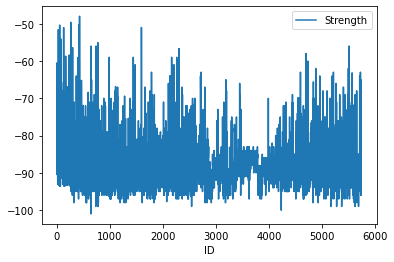

In [40]:
# Plot the Average Signal Strength of Common Objects in S1 (i.e. all objects in S1)
%matplotlib inline
S1.groupby(['ID'])['Strength'].mean().plot(legend=True)
plt.show()

In [41]:
# Define common_S2 as the subset in S2 that contains the common objects (i.e. Objects 1, 2,..., 5745)
common_S2 = S2.loc[S2['ID']<=5745]

In [42]:
common_S2

,ID,tID,Strength
0,1,1,-69
1,2,1,-80
2,3,1,-73
3,4,1,-72
4,5,1,-93
...,...,...,...
803822,719,19384,-94
803824,758,19384,-90
803827,136,19384,-96
803833,383,19384,-92


In [43]:
# To double check common_S2
common_S2.describe()

,ID,tID,Strength
count,575001.000000,575001.000000,575001.000000
mean,915.185871,8979.339046,-87.798126
std,1308.881000,5790.550403,13.298812
min,1.000000,1.000000,-104.000000
25%,90.000000,3712.000000,-94.000000
50%,280.000000,8670.000000,-92.000000
75%,968.000000,14012.000000,-89.000000
max,5745.000000,19384.000000,0.000000


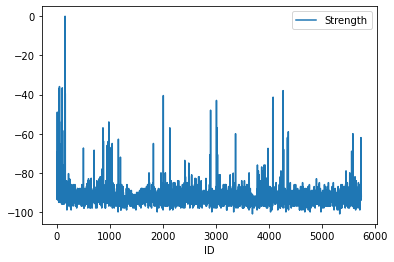

In [44]:
# Plot the average Signal Strength of Common Objects (i.e. Objects 1, 2,..., 5745) in S2
common_S2.groupby(['ID'])['Strength'].mean().plot(legend=True)
plt.show()

**Note:**   
+ At first I tried joining S1 and S2 based on ID, but this code take too long to respond, so I have to find a more efficient way.
+ The more efficient way could be working on S1 and the subset of S2 that contains the common objects.

In [45]:
avg_common_S1 = S1.groupby(['ID'])['Strength'].mean().reset_index(name ='Avg_Strength_S1')

In [46]:
avg_common_S1

,ID,Avg_Strength_S1
0,1,-80.0
1,2,-60.5
2,3,-88.5
3,4,-84.0
4,5,-79.0
...,...,...
5740,5741,-90.0
5741,5742,-96.0
5742,5743,-94.0
5743,5744,-96.0


In [47]:
avg_common_S2 = common_S2.groupby(['ID'])['Strength'].mean().reset_index(name ='Avg_Strength_S2')

In [48]:
avg_common_S2

,ID,Avg_Strength_S2
0,1,-69.50
1,2,-79.50
2,3,-69.50
3,4,-69.25
4,5,-93.60
...,...,...
5740,5741,-92.00
5741,5742,-85.00
5742,5743,-90.00
5743,5744,-89.00


In [49]:
avg_common_S1S2 = pd.merge(avg_common_S1, avg_common_S2, how='inner',on='ID')

In [50]:
avg_common_S1S2

,ID,Avg_Strength_S1,Avg_Strength_S2
0,1,-80.0,-69.50
1,2,-60.5,-79.50
2,3,-88.5,-69.50
3,4,-84.0,-69.25
4,5,-79.0,-93.60
...,...,...,...
5740,5741,-90.0,-92.00
5741,5742,-96.0,-85.00
5742,5743,-94.0,-90.00
5743,5744,-96.0,-89.00


In [51]:
avg_common_S1S2.describe()

,ID,Avg_Strength_S1,Avg_Strength_S2
count,5745.00000,5745.000000,5745.000000
mean,2873.00000,-87.414117,-92.340618
std,1658.58298,6.522131,4.665862
min,1.00000,-101.000000,-101.000000
25%,1437.00000,-92.000000,-94.700000
50%,2873.00000,-89.000000,-93.000000
75%,4309.00000,-85.000000,-91.000000
max,5745.00000,-48.000000,0.000000


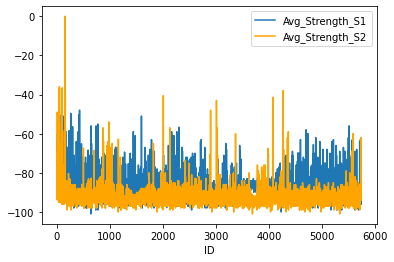

In [52]:
plt.clf()   # Clear figure

# gca stands for 'get current axis'
ax = plt.gca()

avg_common_S1S2.plot(kind='line',x='ID',y='Avg_Strength_S1',ax=ax)
avg_common_S1S2.plot(kind='line',x='ID',y='Avg_Strength_S2', color='orange', ax=ax)

plt.show()

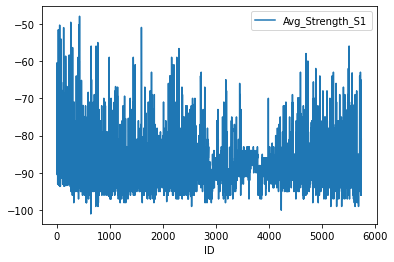

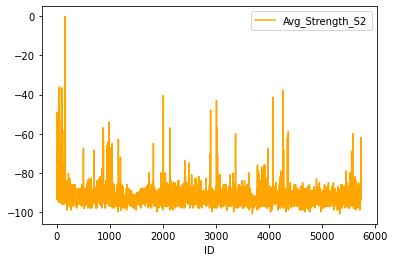

In [53]:
# To plot separately
avg_common_S1S2.plot(kind='line',x='ID',y='Avg_Strength_S1')
avg_common_S1S2.plot(kind='line',x='ID',y='Avg_Strength_S2', color='orange')
plt.show()

**Observation:**   
+ We can see that for the common objects, average signal strength of S1 is generally stronger (i.e. higher number) than average signal strength detected by S2.
+ However, for a few objects, S2 recorded much stronger signal strength.

In [42]:
# This code takes too long to execute
#common = pd.merge(S1, S2, how='inner',on='ID')
#common.rename(columns={'Strength':'Strength_S1', 'tID':'tID_S1'}, inplace=True)
#common.groupby(['ID'])['Strength_S1', 'Strength_S2'].mean().plot()


KeyboardInterrupt



**Uncommon Objects:**

Uncommon Objects are objects 5746 onwards. I will create a subset of these objects from S2 and plot their signal strength.

In [54]:
# Define common_S2 as the subset in S2 that contains the common objects (i.e. Objects 1, 2,..., 5745)
uncommon = S2.loc[S2['ID']>5745]

In [55]:
uncommon

,ID,tID,Strength
117625,5746,2815,-91
117626,5747,2815,-88
117627,5748,2815,-84
117628,5749,2815,-89
117629,5750,2815,-87
...,...,...,...
803838,53129,19384,-89
803839,53130,19384,-90
803840,53131,19384,-92
803841,53132,19384,-93


In [56]:
uncommon.describe()

,ID,tID,Strength
count,228843.000000,228843.000000,228843.000000
mean,23087.505246,11424.673020,-92.547109
std,14046.747292,4661.861476,3.739144
min,5746.000000,2815.000000,-102.000000
25%,9688.000000,7511.000000,-95.000000
50%,19539.000000,11671.000000,-93.000000
75%,34227.000000,15296.000000,-91.000000
max,53133.000000,19384.000000,-33.000000


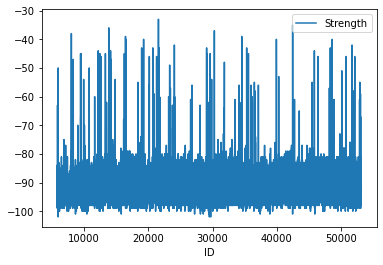

In [57]:
# Clear figure
plt.clf()

# Plot the average Signal Strength of Common Objects (i.e. Objects 1, 2,..., 5745) in S2
uncommon.groupby(['ID'])['Strength'].mean().plot(legend=True)
plt.show()

### How does the signal strength vary between sensors?

**Sensor 1:**

In [58]:
# Average of signal strength between 2 sensors
S1['Strength'].mean()
S2['Strength'].mean()

-89.1500937992944

In [59]:
# Calculate average of signal strength for a given tID for each sensor. Then calculate the mean difference  
S1_avgS=S1.groupby('tID')['Strength'].mean()
S2_avgS=S2.groupby('tID')['Strength'].mean()
S1_S2_merge = pd.merge(S1_avgS, S2_avgS, on='tID')
S1_S2_merge['Diff_S1_S2']=(S1_S2_merge['Strength_x'] - S1_S2_merge['Strength_y'])
mean_diff = (S1_S2_merge['Strength_x'] - S1_S2_merge['Strength_y']).mean()

In [60]:
S1_S2_merge

,Strength_x,Strength_y,Diff_S1_S2
tID,,,
1,-77.700000,-79.222222,1.522222
2,-79.404762,-80.241935,0.837174
3,-73.888889,-80.453125,6.564236
4,-75.577778,-80.076923,4.499145
5,-79.981818,-79.970874,-0.010944
...,...,...,...
19380,-81.894737,-91.863636,9.968900
19381,-79.540000,-87.200000,7.660000
19382,-84.140000,-88.800000,4.660000


**Observation:**   
+ If we take average signal strength across each sensor, Sensor 1 (mean = -81) has stronger signal strength than Sensor 2 (mean = -89)  
+ The difference between average signal strength in S1 and S2 across tID is positive, suggesting S1 has stronger signal than S2 across tID

### Which objects are always present?

Let's count the frequency of detection in each sensor, and let's consider the top 5 are the objects that are always present

In [61]:
S1_count = S1.groupby('ID')['tID'].count().reset_index(name ='count_S1')
S1_count.sort_values('count_S1', ascending=False)

,ID,count_S1
26,27,6388
34,35,6386
55,56,6384
54,55,6374
52,53,6368
...,...,...
4179,4180,1
4180,4181,1
4181,4182,1
4182,4183,1


In [62]:
print("Objects with the most count of detection in Sensor 1 are:")
S1_count[['ID', 'count_S1']].sort_values('count_S1', ascending=False).nlargest(5, 'count_S1')

Objects with the most count of detection in Sensor 1 are:


,ID,count_S1
26,27,6388
34,35,6386
55,56,6384
54,55,6374
52,53,6368


In [63]:
S2_count = S2.groupby('ID')['tID'].count().reset_index(name ='count_S2')
S2_count.sort_values('count_S2', ascending=False)

,ID,count_S2
44,45,6146
48,49,6138
73,74,6068
59,60,5990
86,87,5906
...,...,...
25455,25456,1
25454,25455,1
25453,25454,1
25452,25453,1


In [64]:
print("Objects with the most count of detection in Sensor 2 are:")
S2_count[['ID', 'count_S2']].sort_values('count_S2', ascending=False).nlargest(5, 'count_S2')

Objects with the most count of detection in Sensor 2 are:


,ID,count_S2
44,45,6146
48,49,6138
73,74,6068
59,60,5990
86,87,5906


### Which objects are frequently detected?

**Sensor 1:**

In [73]:
S1_TS1 = S1.merge(TS1, left_on="tID", right_on="tID")
S1_TS1

,ID,tID,Strength,DateTime
0,1,1,-90,2020-04-04 10:15:40
1,2,1,-59,2020-04-04 10:15:40
2,3,1,-87,2020-04-04 10:15:40
3,4,1,-86,2020-04-04 10:15:40
4,5,1,-80,2020-04-04 10:15:40
...,...,...,...,...
945458,130,22330,-91,2020-04-28 07:54:22
945459,1439,22330,-88,2020-04-28 07:54:22
945460,108,22330,-91,2020-04-28 07:54:22
945461,5745,22330,-81,2020-04-28 07:54:22


In [75]:
# Group the merge dataframe by hourly frequency
df1 = (S1_TS1
        .groupby([S1_TS1['ID'], pd.to_datetime(S1_TS1['DateTime']).dt.to_period('H')])['tID']
        .count()
        .astype(int)
        .reset_index())

In [76]:
df1

,ID,DateTime,tID
0,1,2020-04-04 10:00,2
1,1,2020-04-04 11:00,1
2,2,2020-04-04 10:00,2
3,2,2020-04-04 11:00,1
4,3,2020-04-04 10:00,2
...,...,...,...
103088,5741,2020-04-28 07:00,10
103089,5742,2020-04-28 07:00,7
103090,5743,2020-04-28 07:00,6
103091,5744,2020-04-28 07:00,3


In [77]:
df1.rename(columns={'tID':'Count_S1'}, inplace=True)

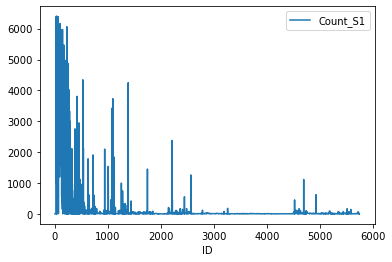

In [78]:
# Clear figure
plt.clf()

# Plot the number of Count_S1 per Object ID in S1
df1.groupby(['ID'])['Count_S1'].sum().plot(legend=True)
plt.show()

**Sensor 2:**

In [78]:
S2_TS2 = S2.merge(TS2, left_on="tID", right_on="tID")
S2_TS2

,ID,tID,Strength,DateTime
0,1,1,-69,2020-04-04 08:49:47
1,1,1,-69,2020-04-04 08:53:59
2,3,1,-73,2020-04-04 08:49:47
3,3,1,-73,2020-04-04 08:53:59
4,4,1,-72,2020-04-04 08:49:47
...,...,...,...,...
804776,53130,19384,-90,2020-04-28 07:55:43
804777,53131,19384,-92,2020-04-28 07:55:43
804778,53132,19384,-93,2020-04-28 07:55:43
804779,53133,19384,-93,2020-04-28 07:55:43


In [75]:
# Group the merge dataframe by hourly frequency
df2 = (S2_TS2
        .groupby([S2_TS2['ID'], pd.to_datetime(S2_TS2['DateTime']).dt.to_period('H')])['tID']
        .count()
        .astype(int)
        .reset_index())

In [77]:
df2.rename(columns={'tID':'Count_S2'}, inplace=True)

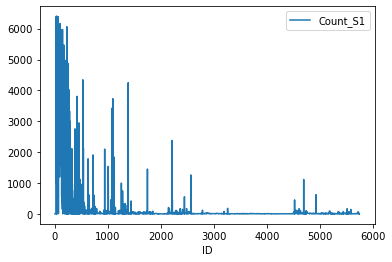

In [78]:
# Clear figure
plt.clf()

# Plot the number of Count_S1 per Object ID in S2
df2.groupby(['ID'])['Count_S2'].sum().plot(legend=True)
plt.show()

### Which objects are rarely detected?

Let's consider objects with count signal of 1 in each sensor are the objects that are rarely detected

**Sensor 1:**

In [79]:
# Objects with count signal of 1 in S1
S1.groupby('ID')['tID'].count()[S1.groupby('ID')['tID'].count() == 1]

ID
31      1
32      1
33      1
34      1
38      1
       ..
5541    1
5679    1
5716    1
5740    1
5745    1
Name: tID, Length: 203, dtype: int64

In [80]:
# Number of Objects with count signal of 1 in S1
S1.groupby('ID')['tID'].count()[S1.groupby('ID')['tID'].count() == 1].sum()

203

**Sensor 2:**

In [81]:
# Objects with count signal of 1 in S2
S2.groupby('ID')['tID'].count()[S2.groupby('ID')['tID'].count() == 1]

ID
7        1
68       1
69       1
70       1
71       1
        ..
52984    1
52985    1
53005    1
53025    1
53045    1
Name: tID, Length: 12556, dtype: int64

In [82]:
# Number of Objects with count signal of 1 in S2
S2.groupby('ID')['tID'].count()[S2.groupby('ID')['tID'].count() == 1].sum()

12556

### What is the signal strength distribution for each detector? Plot the histogram for each.

**Sensor 1:**

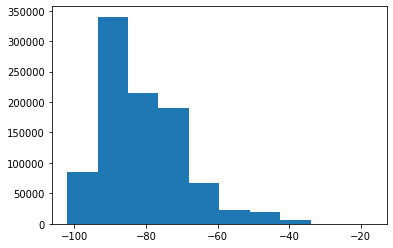

In [26]:
# Signal Strength Distribution of Sensor 1
Signal_S1 = S1["Strength"]
plt.hist(Signal_S1, bins = 10)
plt.show()

**Observation:**   
- Signal strength in Sensor 1 is left-skewed around -90
- Majority of signal strength vary between -100 and -40

In [28]:
skew(Signal_S1)

1.108333310403483

**Sensor 2:**

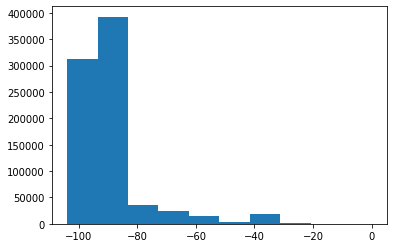

3.2166332095889394

In [29]:
# Signal Strength Distribution of Sensor 2
Signal_S2 = S2["Strength"]
plt.hist(Signal_S2, bins = 10)
plt.show()
skew(Signal_S2)

**Observation:**   
+ Signal strength in Sensor 2 is also left-skewed
+ Signal strength in Sensor 2 is more skewed and concentrated than signal strength in Sensor 1